# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 4</font>
## <font color='blue'>Análise de Dados Para Campanhas de Marketing de Instituições Financeiras</font>

**Não tenha pressa de chegar ao final. O aprendizado não está no final. O aprendizado está na jornada. Aproveite a jornada!**

![title](imagens/Projeto4.png)

## Pré-Requisitos

Recomendamos que você tenha concluído pelo menos os 5 primeiros capítulos do curso gratuito de <a href="https://www.datascienceacademy.com.br/course?courseid=python-fundamentos">Python Fundamentos Para Análise de Dados</a>.

## Instalando e Carregando os Pacotes

In [93]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.3


In [94]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [111]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [96]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Lucas Mendes" --iversions

Author: Lucas Mendes

seaborn   : 0.12.1
numpy     : 1.23.0
pandas    : 1.5.1
matplotlib: 3.6.2



## Carregando os Dados

In [112]:
# Carrega o dataset
df = pd.read_csv("dados/dataset.csv") 

In [113]:
# Shape
df.shape

(45211, 19)

In [114]:
# Amostra
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Análise Exploratória

In [115]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [116]:
# Temos valores nulos? Sim ou não?
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [117]:
# Temos valores nulos? Quantos?
df.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [118]:
# Não usaremos a coluna ID. Vamos removê-la.
df.drop(["customerid"], axis = 1, inplace = True)

In [119]:
# Colunas
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

> Exercício 1: A coluna "jobedu" parece ter duas informações. Vamos separar em duas colunas.

In [120]:
new = df['jobedu'].str.split(',',n=1, expand=True)
df['job']=new[0]
df['edu']= new[1]
df.drop(columns=['jobedu'], inplace=True)
display(df)


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000.0,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000.0,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000.0,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000.0,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [107]:
#Outra forma de realizar esse procedimento:
# Fazemos o split da coluna jobedu e criamos a coluna job com o primeiro elemento antes da vírgula
df['job'] = df["jobedu"].apply(lambda x:x.split(",")[0])
# Fazemos o split da coluna jobedu e criamos a coluna education com o segundo elemento antes da vírgula
df['education'] = df["jobedu"].apply(lambda x:x.split(",")[1])
# Drop da coluna "jobedu" 
df.drop(["jobedu"], axis = 1, inplace = True)

KeyError: 'jobedu'

## Tratamento de Valores Ausentes

> Vamos primeiro tratar a variável que representa a idade.

In [170]:
# Valores ausentes no dataframe
df.isna().any()

age          True
salary      False
balance     False
marital     False
targeted    False
default     False
housing     False
loan        False
contact     False
day         False
month       False
duration    False
campaign    False
pdays       False
previous    False
poutcome    False
response     True
job         False
edu         False
dtype: bool

In [171]:
# Valores ausentes da variável age
df.age.isnull().sum()

20

In [172]:
# Calcula o percentual de valores ausentes na variável age
df.age.isnull().mean()*100

0.0442370219636814

Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 20 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

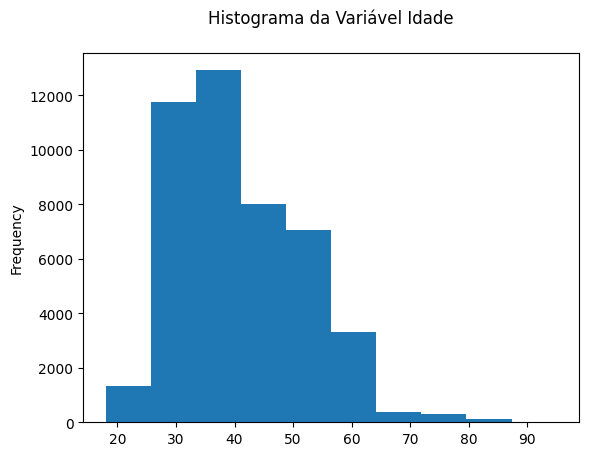

In [173]:
# Histograma
df.age.plot(kind = "hist")
plt.title("Histograma da Variável Idade\n")
plt.show()

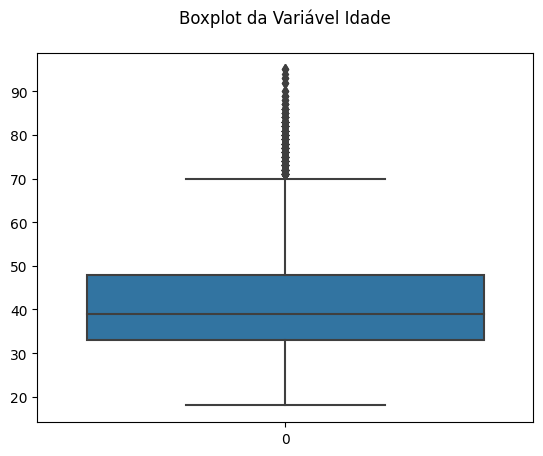

In [174]:
# Boxplot
sns.boxplot(df.age)
plt.title("Boxplot da Variável Idade\n")
plt.show()

In [175]:
# Vamos verificar qual é a média de idade.
df.age.mean()

40.93565090394105

In [176]:
# Vamos verificar qual é a mediana, valor do meio da distribuição quando os dados estão ordenados.
df.age.median()

39.0

In [189]:
# Vamos verificar qual é a moda, o valor que aparece com mais frequência.
df.age.mode()


0    32.0
Name: age, dtype: float64

> Exercício 2: Vamos imputar os valores ausentes da variável age com uma medida de tendência central. Escolha uma das medidas, aplique a imputação e justifique sua escolha. Deixamos a variável como float ou como int? Se convertemos, fazemos isso antes ou depois da imputação?

In [190]:
df.age.fillna("32", inplace = True)


In [191]:
df.age.isnull().sum()

0

In [192]:
# Agora convertemos para int
df.age = df.age.astype('int')

In [193]:
# Tipo da variável
df.age.dtypes

dtype('int32')

In [194]:
# Média
df.age.mean()

40.93169803808808

In [195]:
# Mediana
df.age.median()

39.0

In [196]:
# Percentual de valores ausentes
df.age.isnull().mean()*100

0.0

## Tratamento de Valores Ausentes

> Vamos agora tratar a variável que representa o mês.

In [141]:
# Valores ausentes na variável
df.month.isnull().sum()

50

In [142]:
# Percentual de valores ausentes
df.month.isnull().mean()*100

0.11059255490920351

Como o percentual é menor que 30% não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 50 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

In [143]:
# Tipo da variável
df.month.dtypes

dtype('O')

In [144]:
# Categorias da variável
df.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

> Exercício 3: Vamos imputar os valores ausentes da variável month. Escolha uma estratégia e aplique no dataset.

In [145]:
# Vamos imputar com a moda, o valor mais frequente da variável, pois são poucos registros
df.month.mode()

0    may, 2017
Name: month, dtype: object

In [146]:
# Imputação com a moda
df.month.fillna("may, 2017", inplace = True)

In [147]:
# Valores ausentes tratados com sucesso
df.month.isnull().sum()

0

## Tratamento de Valores Ausentes

> Vamos agora tratar a variável que representa o salário.

In [197]:
# Valores ausentes na variável
df.salary.isnull().sum()

0

In [149]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

0.05750812855278583

Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 26 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

Mas espere. Vamos checar algo aqui.

In [150]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


Existe salário igual a zero? Não. O valor zero é provavelmente um valor ausente (confirmar com a área de negócio).

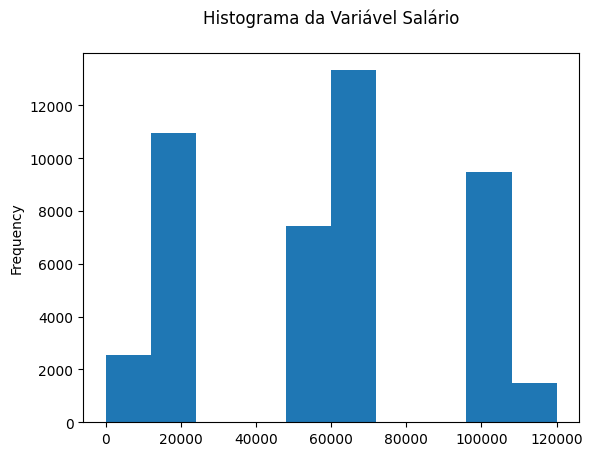

In [151]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

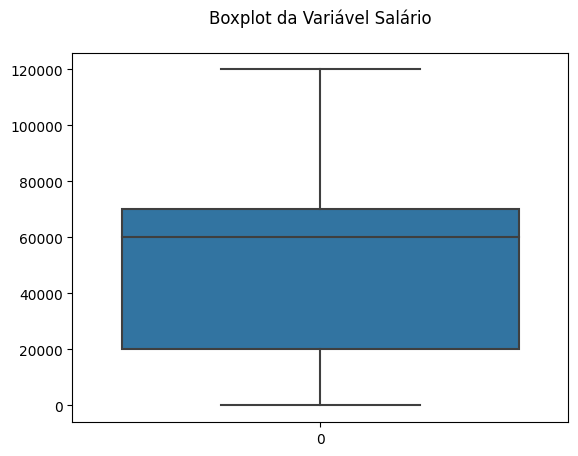

In [152]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [153]:
# Vamos verificar qual é a média de idade.
df.salary.mean()

57008.65331415293

In [154]:
# Vamos verificar qual é a mediana.
df.salary.median()

60000.0

In [155]:
# Vamos verificar qual é a moda.
df.salary.mode()

0    20000.0
Name: salary, dtype: float64

> Exercício 4: Vamos imputar os valores ausentes da variável salary com uma medida de tendência central. Precisamos também tratar os valores iguais a zero. Escolha sua estratégia, aplique a imputação e justifique sua escolha. 

In [198]:
# Vamos preencher com a mediana pois os dados parecem assimétricos (nesse caso a média não pode ser usada) 
# e o valor mais frequente está muito abaixo da média e da mediana (por isso não usaremos a moda)
df.salary.fillna("60000", inplace = True)

In [199]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [158]:
# Histograma (vai gerar erro)
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

TypeError: no numeric data to plot

In [159]:
# Tipo da variável
df.salary.dtypes

dtype('O')

In [200]:
# Convertemos para o tipo float
df.salary = df.salary.astype("float")

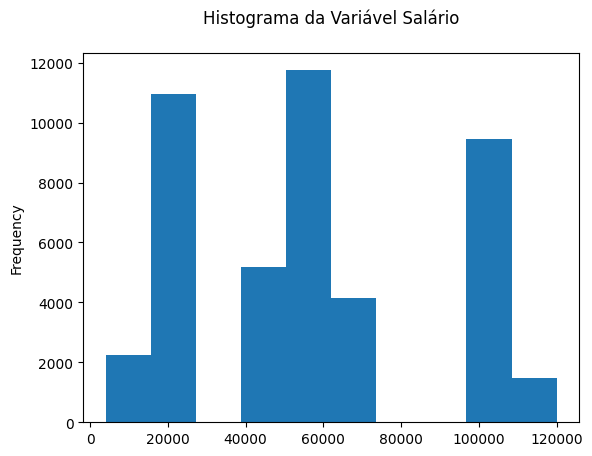

In [201]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

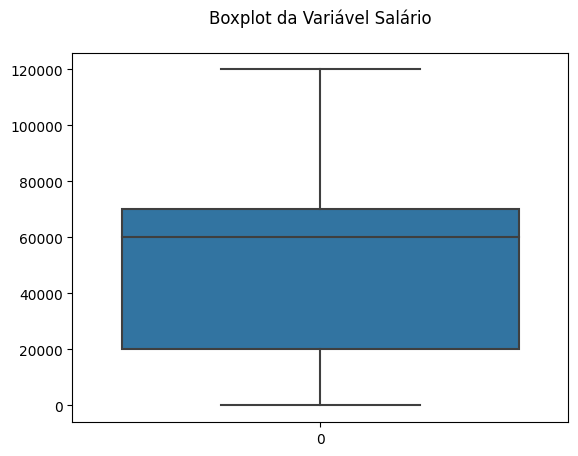

In [162]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [163]:
# Registros para cada salário
df.salary.value_counts()

20000.0     9725
100000.0    9454
60000.0     9195
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
Name: salary, dtype: int64

In [164]:
# Replace do zero pela mediana
df['salary'] = df['salary'].replace(0, df['salary'].median())

In [165]:
# Registros para cada salário
df.salary.value_counts()

20000.0     9725
60000.0     9483
100000.0    9454
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
Name: salary, dtype: int64

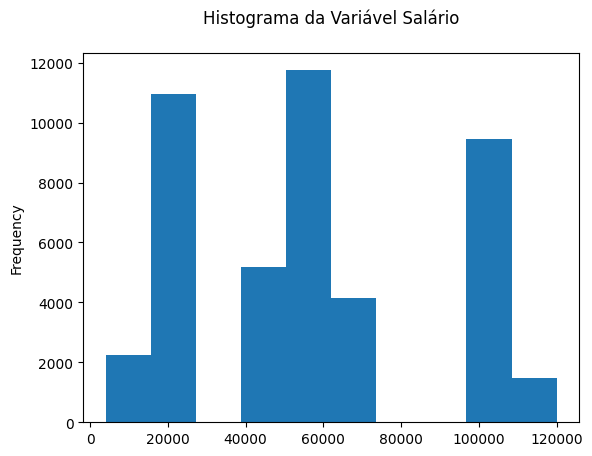

In [166]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

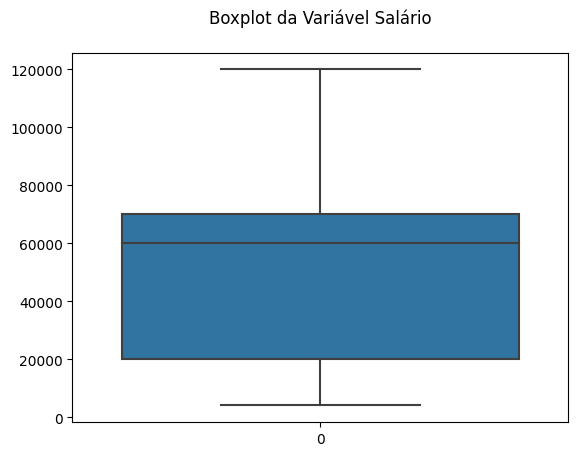

In [167]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [168]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

0.0

In [202]:
df.isna().any()

age         False
salary      False
balance     False
marital     False
targeted    False
default     False
housing     False
loan        False
contact     False
day         False
month       False
duration    False
campaign    False
pdays       False
previous    False
poutcome    False
response     True
job         False
edu         False
dtype: bool

## Tratamento de Valores Ausentes

> Vamos agora tratar a variável que representa a resposta (variável alvo).

In [ ]:
df.head()

In [203]:
# Valores ausentes
df.response.isnull().sum()

30

In [204]:
# Calcula o percentual
df.response.isnull().mean()*100

0.0663555329455221

Como o percentual é baixo (e a variável é o alvo da nossa análise) não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 30 linhas no dataset) ou podemos aplicar imputação.

> Exercício 5: Escolha sua estratégia, aplique e justifique sua escolha. 

In [205]:
# Não devemos aplicar imputação na variável de estudo (variável resposta ou variável alvo)
# Vamos dropar os registros
df.dropna(subset = ["response"], inplace = True)

In [206]:
# Verifca valores NA
df.isnull().sum()

age         0
salary      0
balance     0
marital     0
targeted    0
default     0
housing     0
loan        0
contact     0
day         0
month       0
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
response    0
job         0
edu         0
dtype: int64

## Tratamento de Valores Ausentes

> Vamos agora tratar a variável pdays.

In [207]:
# Valores ausentes
df.pdays.isnull().sum()

0

In [208]:
# Describe
df.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indica valor ausente

In [209]:
# Vamos fazer relace de -1 por NaN
df.pdays = df.pdays.replace({-1.0:np.NaN})

In [210]:
# Valores ausentes
df.pdays.isnull().sum()

36930

In [211]:
# Calcula o percentual
df.pdays.isnull().mean()*100

81.73789867422147

> Exercício 6: Escolha sua estratégia, aplique e justifique sua escolha. 

In [212]:
# Drop da coluna "pdays" pois tem mais de 30% dos valores ausentes
df.drop(["pdays"], axis = 1, inplace = True)

In [213]:
# Valores ausentes
df.isnull().sum()

age         0
salary      0
balance     0
marital     0
targeted    0
default     0
housing     0
loan        0
contact     0
day         0
month       0
duration    0
campaign    0
previous    0
poutcome    0
response    0
job         0
edu         0
dtype: int64

## Conclusão e Análise de dados

### Análise Univariada

In [214]:
# Proporção da variável de estado civil
df.marital.value_counts(normalize = True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

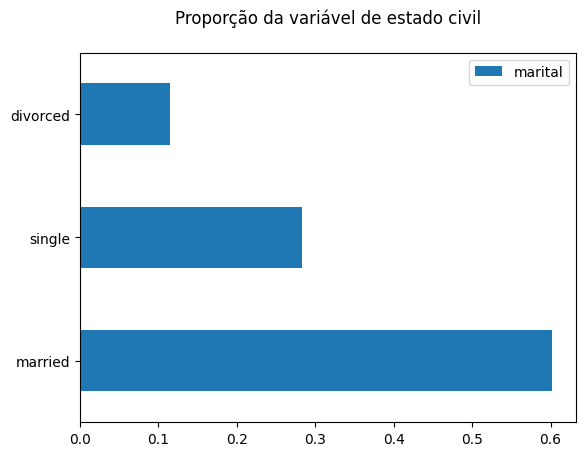

In [215]:
# Plot
df.marital.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de estado civil\n")
plt.legend()
plt.show()

In [216]:
# Proporção da variável de job
df.job.value_counts(normalize = True)

blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: job, dtype: float64

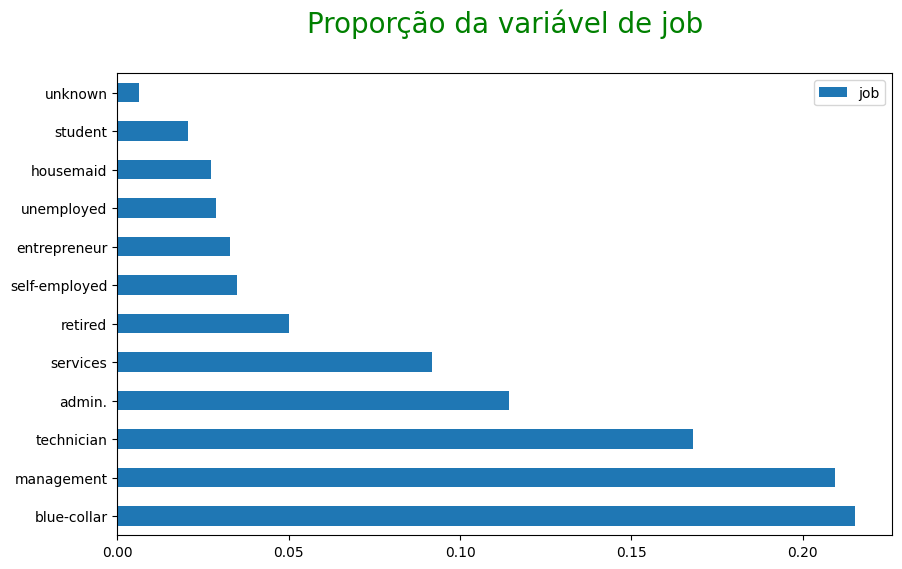

In [217]:
# Plot
plt.figure(figsize = (10,6))
df.job.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de job\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.show()

In [219]:
# Proporção da variável de education
df.edu.value_counts(normalize = True)

secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: edu, dtype: float64

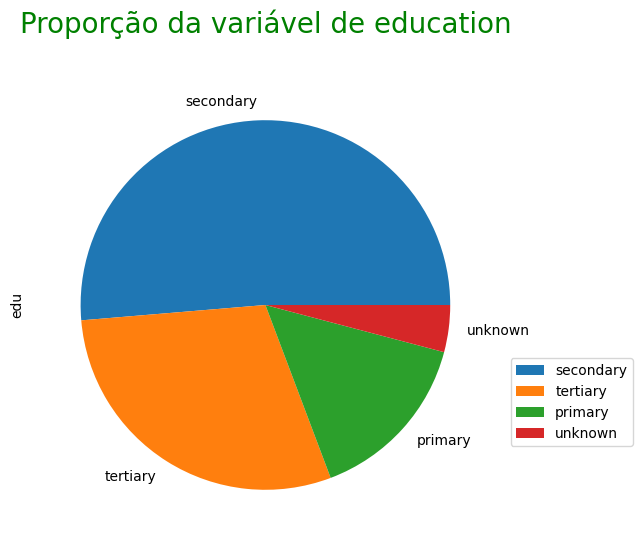

In [220]:
# Plot
plt.figure(figsize = (10,6))
df.edu.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da variável de education\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

In [221]:
# Proporção da variável response
df.response.value_counts(normalize = True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

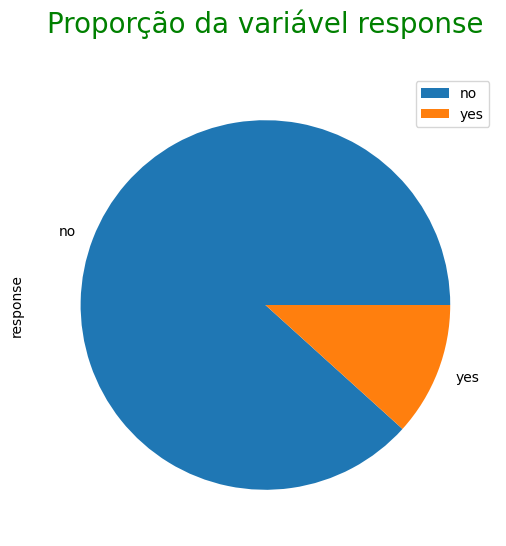

In [222]:
# Plot
plt.figure(figsize = (10,6))
df.response.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da variável response\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.show()

## Análise Multivariada

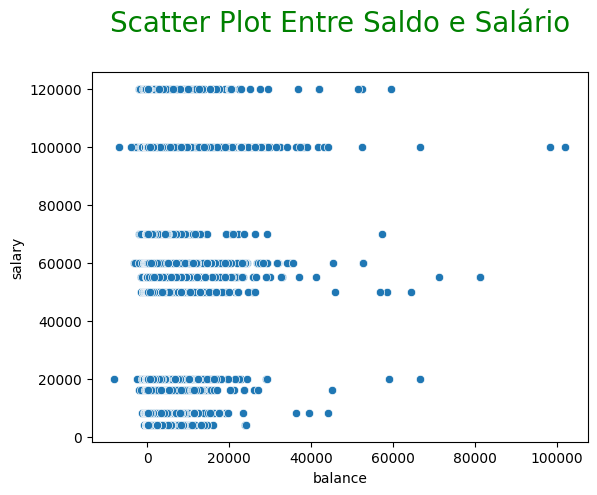

In [243]:
# Scatter Plot
sns.scatterplot(x=df["balance"], y=df["salary"])
plt.title("Scatter Plot Entre Saldo e Salário\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

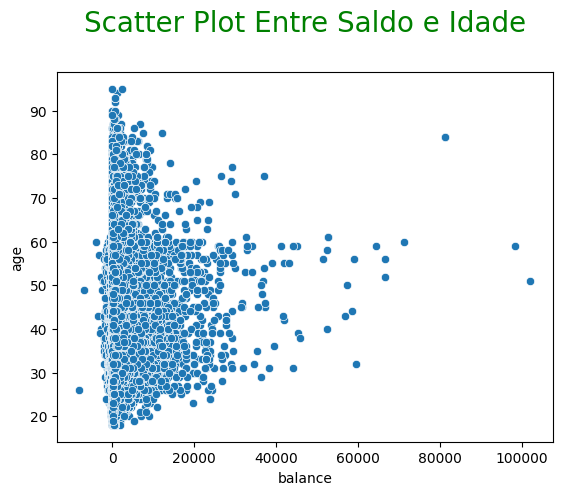

In [244]:
# Scatter Plot
sns.scatterplot(x=df["balance"], y=df["age"])
plt.title("Scatter Plot Entre Saldo e Idade\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

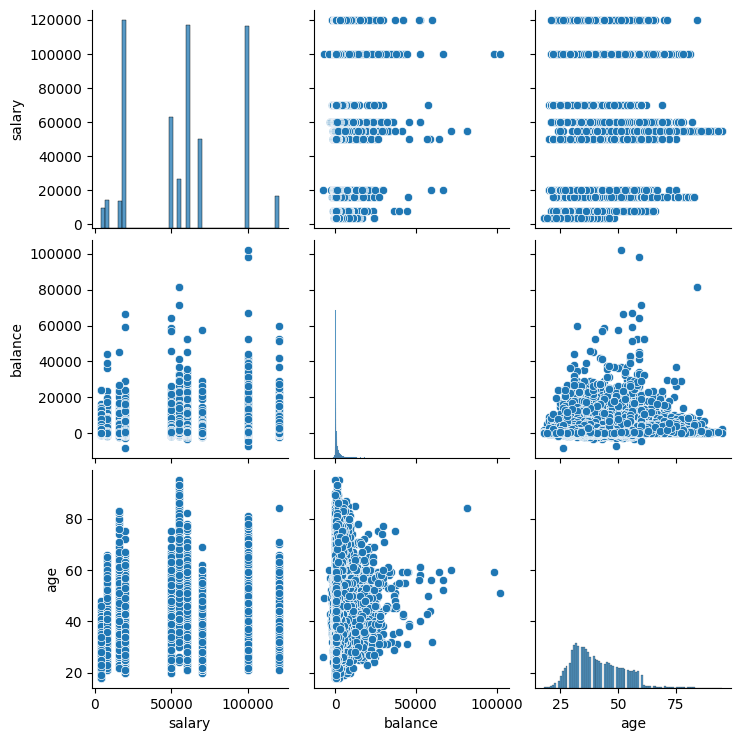

In [245]:
# Pair Plot
sns.pairplot(df[["salary","balance","age"]])
plt.show()

In [246]:
# Calcula a correlação
res = df[["salary", "balance", "age"]].corr()

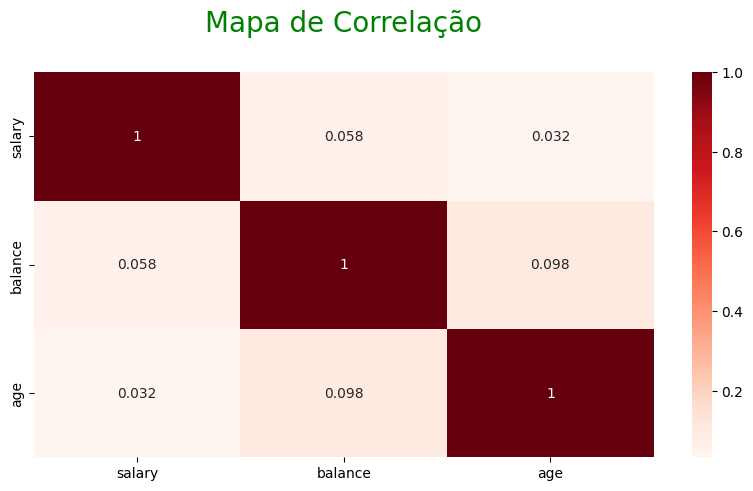

In [247]:
# Mapa de Correlação
plt.figure(figsize = (10,5))
sns.heatmap(res, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

## Númerico x Categórico

In [248]:
# Agrupa o salário pela variável resposta e calcula a média
df.groupby(by = ["response"])["salary"].mean()

response
no     57157.692886
yes    59157.556270
Name: salary, dtype: float64

In [249]:
# Agrupa o salário pela variável resposta e calcula a mediana
df.groupby(by = ["response"])["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

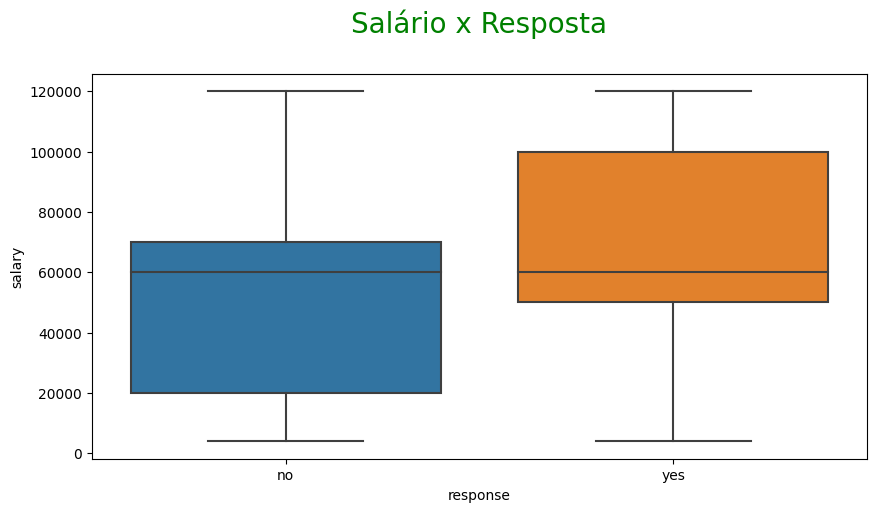

In [251]:
# Boxplot
plt.figure(figsize = (10,5))
sns.boxplot(x=df["response"], y=df["salary"])
plt.title("Salário x Resposta\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [252]:
# Agrupa educação por salário e calcula a média
df.groupby(by = ["edu"])["salary"].mean()

edu
primary      34697.106955
secondary    49922.420113
tertiary     83041.077340
unknown      50708.512931
Name: salary, dtype: float64

In [253]:
# Cria a variável response_flag como tipo numérico onde response "yes"= 1, "no"= 0
df["response_flag"] = np.where(df["response"] == "yes",1,0)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,edu,response_flag
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary,0
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary,0
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary,0
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,0,unknown,no,blue-collar,unknown,0
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,0,unknown,no,unknown,unknown,0


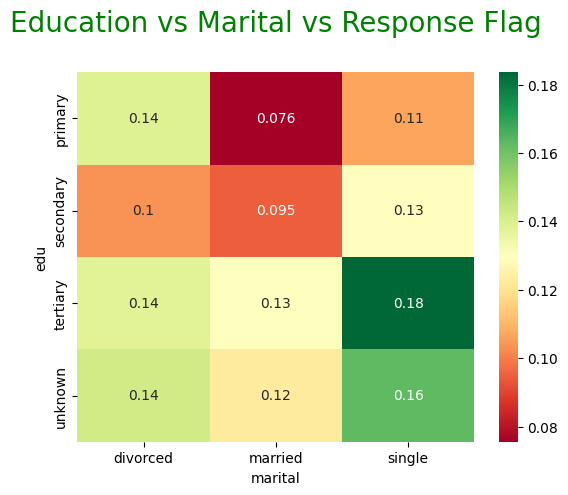

In [255]:
# Mapa de correlação
res1 = df.pivot_table(index = "edu", columns = "marital", values = "response_flag", aggfunc = "mean")
sns.heatmap(res1, annot = True, cmap = "RdYlGn")
plt.title("Education vs Marital vs Response Flag\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

# Fim